# Load and Preprocess Data

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Loading data
file_path = 'StressLevels_Weather_Data_WithExams_Last.xlsx'
df = pd.read_excel(file_path)

# Defining features and target
X = df.drop(columns=["Stress Level", "Date", "Time"])  # Changed file_path to df
y = df["Stress Level"]  # Changed file_path to df

# Defining categorical and numerical columns
categorical_features = ["Day of Week", "Time of Day", "Weather Condition"]
numerical_features = ["Temperature (°C)"]

# Setting up preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(), categorical_features)
])

# Model Setup 

In [33]:
models = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel="rbf"),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training and Evaluation

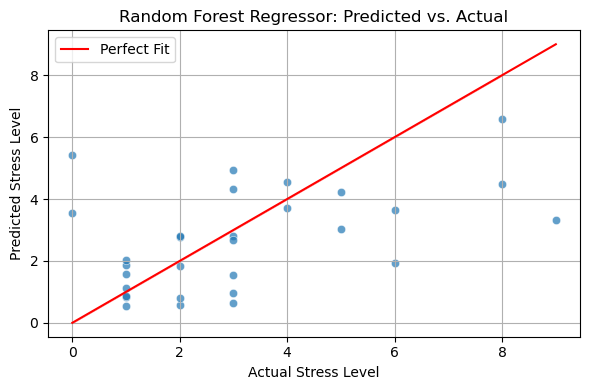

Model: Random Forest Regressor
Mean Squared Error: 4.67
R^2 Score: 0.15



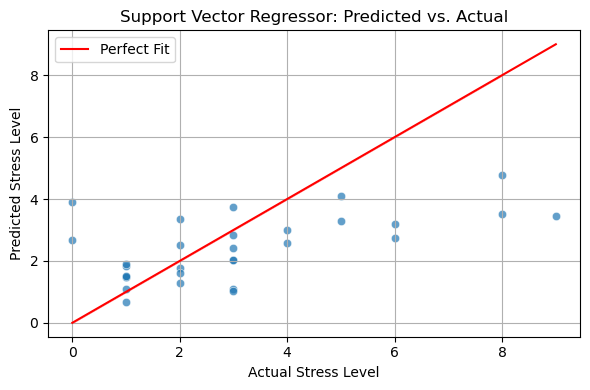

Model: Support Vector Regressor
Mean Squared Error: 4.15
R^2 Score: 0.24



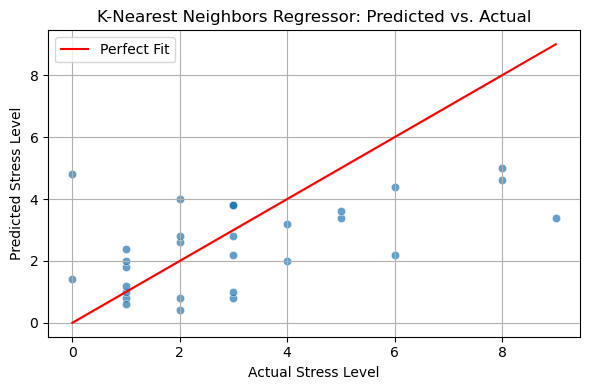

Model: K-Nearest Neighbors Regressor
Mean Squared Error: 4.25
R^2 Score: 0.23



In [34]:
results = {}

# Training and evaluating each model
for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')
    plt.xlabel("Actual Stress Level")
    plt.ylabel("Predicted Stress Level")
    plt.title(f"{name}: Predicted vs. Actual")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "model": model,
        "mse": mse,
        "r2": r2
    }
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}\n")


# Model Performance Comparison

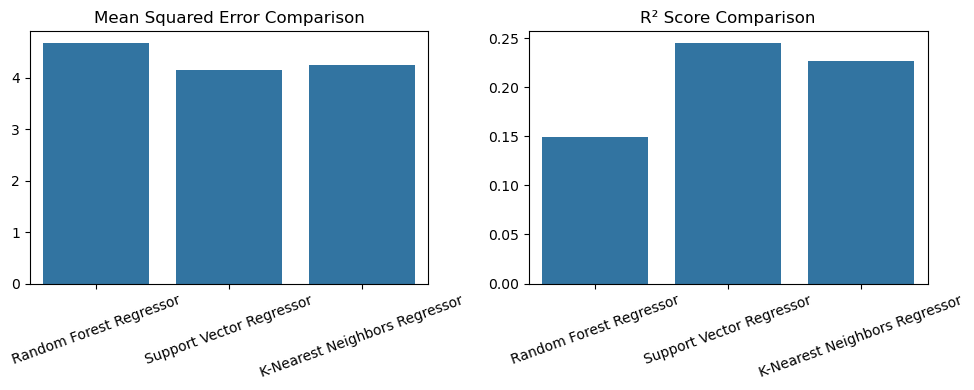

In [35]:
# Extract metrics
mse_vals = [v['mse'] for v in results.values()]
r2_vals = [v['r2'] for v in results.values()]
labels = list(results.keys())

# Plot comparison
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=mse_vals)
plt.title("Mean Squared Error Comparison")
plt.xticks(rotation=20)

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=r2_vals)
plt.title("R² Score Comparison")
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()
